In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st
import io

In [5]:
st.title('Heart disease')

2022-03-10 16:22:49.031 
  command:

    streamlit run C:\Users\jesse\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

    Namen: Saadia Dif
           Jesse van Evert
           Sandor Miezenbeek
           Nadia Portier
    Groep: nr 3


In [6]:
st.header('Steps')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [7]:
st.write('1. Kaggle API')
st.write('2. DATA')
st.write('3. Exploratory Data Analysis and Understanding the problem')
st.write('4. Data Analysis')
st.write('5. Cleaning dataset')

In [8]:
st.header('1. Kaggle API')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [9]:
st.write('Eerst moet kaggle worden geïnstalleerd met de command: pip install kaggle.')
st.write('Daarna moet er een API token worden gedownload van kaggle; deze token moet je vervolgens naar de .kaggle map op je computer kopiëren.')
st.write('Vervolgens moet je de API importeren zoals hieronder:')

In [10]:
st.code('from kaggle.api.kaggle_api_extended import KaggleApi', language='python')
#from kaggle.api.kaggle_api_extended import KaggleApi

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [11]:
st.write('Nadat de API is geïmporteerd kennen we deze toe aan een variabele. '
         'Daarna voeren we authenticate() uit want je moet geauthenticeert zijn voordat je data kan binnenhalen.')

In [12]:
st.code('api = KaggleApi()', language='python')
st.code('api.authenticate()', language='python')
#api = KaggleApi()
#api.authenticate()

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [13]:
st.write('Na de voorstaande stappen te hebben uitgevoerd kunnen we een dataset downloaden via de API op de onderstaande manier:')

In [14]:
st.code("api.dataset_download_file('johnsmith88/heart-disease-dataset', file_name='heart.csv')", language='python')
#api.dataset_download_file('johnsmith88/heart-disease-dataset', file_name='heart.csv')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [15]:
st.header('2. Data')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
heart_disease_df = pd.read_csv('heart.csv')

In [17]:
heart_disease_df_rename = pd.read_csv('heart.csv')

In [18]:
st.dataframe(heart_disease_df.head())

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [19]:
st.write('De afkorting van sommige kolomen zijn nietszeggend, dus deze gaan we veranderen')


In [20]:
heart_disease_df_rename.rename(columns={"age": "Age",
                                 "sex": "Sex",
                                "cp": "CPT",
                                "trestbps": "RBP",
                                "chol": "S.Chol",
                                "fbs": "FBP",
                                "restecg": "R.ECG",
                                "thalach": "max.HRA",
                                "exang": "EIA",
                                "oldpeak": "Oldpeak",
                                "slope": "Slope",
                                "ca": "N.mv",
                                "thal": "TSL",
                                "target": "Target"},inplace=True)

In [21]:
heart_disease_df_rename.columns = [['Age', 'Sex', 'CPT', 'RBP', 'S.Chol', 'FBP', 'R.ECG', 'max.HRA', 'EIA', 'Oldpeak', 'Slope', 'N.mv', 'TSL', 'Target'], 
                            ['', '1=M 0=F', 'type 0-3', '>130-140 concern', '>200 concern', '> 120 1=true 0=false', 'result 0-2', '', '1=yes 0=no', 'in mm', ' up,flat,down 0=better heart 1=healty heart 2=unhealthy heart', 'color vessels 0-3', '1,3= normal 6=fixed defect 7=reversable defect', '1=disease 0=not disease']]  





In [22]:
st.dataframe(heart_disease_df_rename)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Abbreviations

    Age		Age					          Age in years
    Sex     Sex					          1= male 0 = female
    CPT 	Chest Pain Type		          0= Typical angina: chest pain related decrease blood supply to the heart
                                          1= Atypical angina: chest pain not related to heart
                                          2= Non-anginal pain: typically esophageal spasms (non heart related)
                                          3= Asymptomatic: chest pain not showing signs of disease
    RBP     Resting Blood Pressure        Above 130-140 is typically cause for concern
    S.Chol	Serum Cholestoral	          Above 200 is cause for concern 
    FBP		Fasting Blood Sugar	          > 120 mg/dl 1=true; 0=false 
                                          >126 mg/dl signals diabetes                               
    R.ECG	Resting ElectroCardioGraphic  0=Nothing to note
                                          1= ST T Wave abnormality signals non-normal heart beat
                                          2= Possible or definite left ventricular hypertrophy
    max.HRA	Maximum Heart Rate Achieved				
    EIA		Exercise Induced Angina		  1 = yes 0 = no
    Oldpeak	                              ST depression induced by exercise relative to rest 
                                          looks at stress of heart during excercise unhealthy heart will stress more
    Slope   The slope of the peak 		  0= Upsloping: better heart rate with excercise (uncommon)
                                          1= Flatsloping: minimal change (typical healthy heart
                                          2= Downslopins: signs of unhealthy heart
    N.mv    Number of Major Vessels       Colored by flourosopy	(0-3)
                                          Colored vessel means the doctor can see the blood passing through
                                          The more blood movement the better (no clots)
    TSL		Thalium Stress Result		  1,3= normal
                                          6= fixed defect: used to be defect but ok now
                                          7= reversable defect: no proper blood movement when excercising
    Target	Target Have disease or not	  1 = yes 0 = no

In [23]:
st.header('3. Verkenende data analyse en het probleem begrijpen')


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [24]:
st.write('Aantal rijen en aantal kolommen')

In [25]:
st.write(heart_disease_df.shape)

In [26]:
st.write('Beknopte samenvatting van de dataset')

In [27]:
#concise summary of our dataset.
buffer = io.StringIO()
heart_disease_df.info(buf=buffer)
s = buffer.getvalue()
#st.dataframe(heart_disease_df.info())
st.text(s)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [28]:
st.write('Statistische beschrijving per kolom')

In [29]:
#Generating descriptive statistics.
st.write(heart_disease_df.describe().T)

In [30]:
st.header('4. Data Analysis')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [31]:
st.write('Hoeveel mensen hebben er een hartziekte')

In [32]:
st.write(heart_disease_df.target.value_counts())

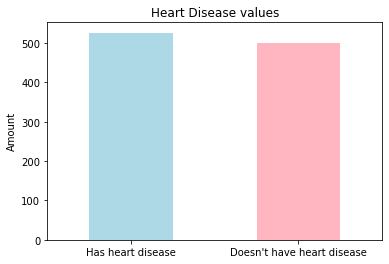

In [33]:
#plotting bar chart.
fig = heart_disease_df.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightpink'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");
#Werkt nog niet
#st.bar_chart(heart_disease_df.value_counts())
#st.pyplot(fig)

    #Van de gehele dataset is er geen groot verschil tussen wel of geen hartziekte hebben. 
    #Er zijn wel meer mensen die een hartziekte hebben in het figuur. (blauw) 

In [34]:
st.write('Hoeveel mannen/vrouwen zijn er in de dataset')

In [35]:
st.write(heart_disease_df.sex.value_counts())

In [36]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(heart_disease_df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['#fe9999','#99e9ff'])
ax1.axis('equal')
st.pyplot(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

    #Er zijn meer mannen dan vrouwen aanwezig in de dataset. 
    #70% mannen en 30% vrouwen

In [37]:
st.write('Welk geslacht heeft er meer last van hartziektes')

In [38]:
#Sex; 1= Male, 0=Female
#target; 1= heart disease, 0= no heart disease
st.write(pd.crosstab(heart_disease_df.target, heart_disease_df.sex))

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

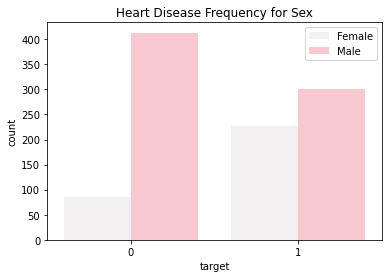

In [39]:
#visualizing in countplot
fig = plt.figure()
sns.countplot(x = 'target', data = heart_disease_df, hue = 'sex', color= 'pink')
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");
st.pyplot(fig)

    # Onderscheid maken tussen wel en geen hartziektes, man/vrouw. 
    # Figuur is niet betrouwbaar, er zijn meer mannen aanwezig in de dataset zoals net te zien was in de pie chart. 
    # In dropdown wordt dit nog weergegeven in percentages 

In [40]:
st.write('Leeftijdsverdeling')


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

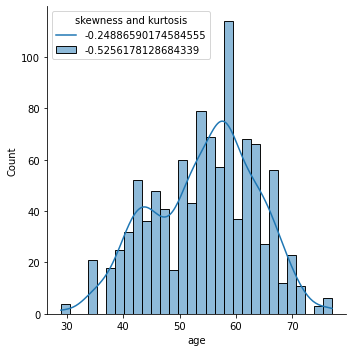

In [41]:
#create a distribution plot with normal distribution curve
fig = sns.displot( x = 'age', data = heart_disease_df, bins = 30, kde = True)
skewness=str(heart_disease_df["age"].skew())
kurtosis=str(heart_disease_df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
st.pyplot(fig)

    # Er is een leeftijd verdelig te zien
    # De data is niet normaal verdeeld, dit is te zien aan de 2 toppen
    
#Skewness is a measure of symmetry, or more precisely, 
#the lack of symmetry. A distribution, or data set, 
#is symmetric if it looks the same to the left and right 
#of the center point. 

#Kurtosis is a measure of whether the data are heavy-
#tailed or light-tailed relative to a normal distribution.

In [42]:
st.header('Heatmap')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

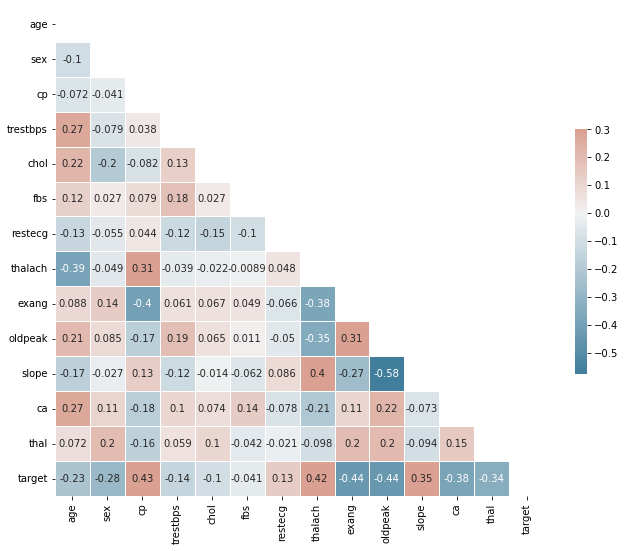

In [43]:
corr = heart_disease_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);
st.pyplot(fig)

    # Er is een heatmap te zien, waar je de correlaties tussen de verschillende categorien kunt bekijken. 
    # als voorbeeld, de Chest pain (CP) en Target heeft de grootste correlatie van 0.43

In [44]:
st.header('4.1  Slider')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [45]:
st.write('Cholesterol en hartziekte')

In [46]:
fig = px.box(heart_disease_df, y='chol', x= 'target', 
            points="all", color='target')
              
sliders = [
    {'steps':[
        {'method':'update','label':'Both',
             'args':[{'visible':[True,True]}]},
        {'method':'update','label':'0, no heart disease',
             'args':[{'visible':[True,False]}]},
        {'method':'update','label':'1, heart disease',
             'args':[{'visible':[False,True]}]}
    ]}
]
 
 
fig.update_layout({'sliders':sliders})
 
 
fig.update_layout({'xaxis':{'title':{'text':'Target'}}})
fig.update_layout({'yaxis':{'title':{'text':'Chol, (>200 concern)'}}})
fig.update_layout({'title':{'text':'High cholesterol leads to heart disease distribution'}})
st.plotly_chart(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

    # Cholesterol gehalte >200 mg/dl kan leiden tot een hartziekte
    # Uit deze visualisatie laat ziet dat alleen een te hoge cholesterol gehalte niet altijd lijdt tot hartziekte
    # Hier kunnen geen verdere uitspraken gedaan worden, en zou er verdere onderzoek gedaan moeten worden. 

In [47]:
st.write('Resting blood pressure, OK and Concern')

In [48]:
fig = px.box(heart_disease_df, y='trestbps', x= 'target', 
            points="all", color='target')
              
sliders = [
    {'steps':[
        {'method':'update','label':'Both',
             'args':[{'visible':[True,True]}]},
        {'method':'update','label':'0, no heart disease',
             'args':[{'visible':[True,False]}]},
        {'method':'update','label':'1, heart disease',
             'args':[{'visible':[False,True]}]}
    ]}
]
 
 
fig.update_layout({'sliders':sliders})
 
 
fig.update_layout({'xaxis':{'title':{'text':'Target'}}})
fig.update_layout({'yaxis':{'title':{'text':'trestbps, (>130 concern)'}}})
fig.update_layout({'title':{'text':'High resting blood pressure leads to heart disease distribution'}})
st.plotly_chart(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

    # Resting blood pressure  > 130 kan leiden tot een hartziekte (concern)
    # Uit deze visualisatie laat ziet dat alleen een te hoge bloeddruk niet altijd lijdt tot hartziekte
    # Hier kunnen geen verdere uitspraken gedaan worden, en zou er verdere onderzoek gedaan moeten worden, 
    bijv combinaties met andere categorien

In [49]:
st.write('Target and CP')

In [50]:
fig = px.box(heart_disease_df, y='age', x= 'target', color='cp')
              
sliders = [
    {'steps':[
        {'method':'update','label':'All cp',
             'args':[{'visible':[True,True]}]},
        {'method':'update','label':'cp 0 and 2',
             'args':[{'visible':[True,False]}]},
        {'method':'update','label':'cp 1 and 3',
             'args':[{'visible':[False,True]}]}
    ]}
]
 
 
fig.update_layout({'sliders':sliders})
 
 
fig.update_layout({'xaxis':{'title':{'text':'Target'}}})
fig.update_layout({'yaxis':{'title':{'text':'Age'}}})
fig.update_layout({'title':{'text':'Age vs Target vs Chestpain distribution'}})
st.plotly_chart(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [51]:
st.header('4.2 Checkbox')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
st.write('Cholesterol gehalte gepaard met Bloeddruk')

In [53]:

chol_above_rbp_above=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps>=130)])
chol_above_rbp_below=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps<130)])
chol_below_rbp_below=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps<130)])
chol_below_rbp_above=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps>=130)])
#print(chol_above_rbp_above, chol_above_rbp_below, chol_below_rbp_below, chol_below_rbp_above)

In [54]:
chol_above_rbp_above_disease=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps>=130)&(heart_disease_df.target==1)])
chol_above_rbp_below_disease=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps<130)&(heart_disease_df.target==1)])
chol_below_rbp_below_disease=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps<130)&(heart_disease_df.target==1)])
chol_below_rbp_above_disease=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps>=130)&(heart_disease_df.target==1)])
#print(chol_above_rbp_above_disease, chol_above_rbp_below_disease, chol_below_rbp_below_disease, chol_below_rbp_above_disease)

In [55]:
chol_above_rbp_above_OK=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps>=130)&(heart_disease_df.target==0)])
chol_above_rbp_below_OK=len(heart_disease_df[(heart_disease_df.chol>200)&(heart_disease_df.trestbps<130)&(heart_disease_df.target==0)])
chol_below_rbp_below_OK=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps<130)&(heart_disease_df.target==0)])
chol_below_rbp_above_OK=len(heart_disease_df[(heart_disease_df.chol<=200)&(heart_disease_df.trestbps>=130)&(heart_disease_df.target==0)])
#print(chol_above_rbp_above_OK, chol_above_rbp_below_OK, chol_below_rbp_below_OK, chol_below_rbp_above_OK)

In [56]:
df_chol_rbp_target_ = pd.DataFrame({
'chol_above_rbp_above': [481],
'chol_above_rbp_below': [372],
'chol_below_rbp_below': [85],
'chol_below_rbp_above': [87],
'chol_above_rbp_above_disease': [231],
'chol_above_rbp_below_disease': [196],
'chol_below_rbp_below_disease': [49],
'chol_below_rbp_above_disease': [50],

'chol_above_rbp_above_OK': [250],
'chol_above_rbp_below_OK': [176],
'chol_below_rbp_below_OK': [36],
'chol_below_rbp_above_OK': [37],
'both high': ['both high'],
'high chol': ['high chol'],
'both OK' : ['both OK'],
'high rbp' : ['high rbp'],
'both high disease': ['both high disease'],
'high chol disease': ['high chol disease'],
'both OK disease' : ['both OK disease'],
'high rbp disease' : ['high rbp disease'],

'both high no disease': ['both high no disease'],
'high chol no disease': ['high chol no disease'],
'both OK no disease' : ['both OK no disease'],
'high rbp no disease' : ['high rbp no disease']
})


chol_above_rbp_above  chol_above_rbp_below  chol_below_rbp_below  \
0                   481                   372                    85   

   chol_below_rbp_above  chol_above_rbp_above_disease  \
0                    87                           231   

   chol_above_rbp_below_disease  chol_below_rbp_below_disease  \
0                           196                            49   

   chol_below_rbp_above_disease  chol_above_rbp_above_OK  \
0                            50                      250   

   chol_above_rbp_below_OK  ...  both OK  high rbp  both high disease  \
0                      176  ...  both OK  high rbp  both high disease   

   high chol disease  both OK disease  high rbp disease  both high no disease  \
0  high chol disease  both OK disease  high rbp disease  both high no disease   

   high chol no disease  both OK no disease  high rbp no disease  
0  high chol no disease  both OK no disease  high rbp no disease  

[1 rows x 24 columns]

In [57]:
fig4 = go.Figure()
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_above'], x=df_chol_rbp_target_['both high'], name = 'both high, leads to heart disease?'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_below'], x=df_chol_rbp_target_['high chol'], name = 'high chol'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_below'], x=df_chol_rbp_target_['both OK'], name = 'both OK, leads to no heart disease?'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_above'], x=df_chol_rbp_target_['high rbp'], name = 'high rbp'))


fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_above_disease'], x=df_chol_rbp_target_['both high disease'], name = 'both high disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_below_disease'], x=df_chol_rbp_target_['high chol disease'], name = 'high chol disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_below_disease'], x=df_chol_rbp_target_['both OK disease'], name = 'both OK disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_above_disease'], x=df_chol_rbp_target_['high rbp disease'], name = 'high rbp disease'))

fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_above_OK'], x=df_chol_rbp_target_['both high no disease'], name = 'both high no disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_above_rbp_below_OK'], x=df_chol_rbp_target_['high chol no disease'], name = 'high chol no disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_below_OK'], x=df_chol_rbp_target_['both OK no disease'], name = 'both OK no disease'))
fig4.add_trace(go.Bar(y=df_chol_rbp_target_['chol_below_rbp_above_OK'], x=df_chol_rbp_target_['high rbp no disease'], name = 'high rbp no disease'))

fig4.update_layout({'yaxis': {'title':{'text': 'People counts'}}})
fig4.update_layout({'title':{'text': 'Looking at heart disease through Chol, rbp and target'}})
st.plotly_chart(fig4)

In [58]:
st.write('Borstpijn en leeftijd')

In [59]:
fig = px.box(heart_disease_df, y='age', x= 'cp', title= 'Borstpijn vs leeftijd, Boxplot + checkbox ',
            points="all", color='cp')
fig.update_layout(width = 800, boxgroupgap = 0.2, boxgap = 0.8)
fig.update_xaxes(categoryorder='array')
st.plotly_chart(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

    # Spreiding van alle leeftijden van de verschillende typen chestpain
    # Je kan de verschille typen chestpai selecteren en deselecteren (checkbox)
    # type 3 lijd tot hartziekte en daar zitten de oudste personen. 
    
    
    0: Typische angina: pijn op de borst gerelateerd aan verminderde bloedtoevoer naar het hart
    1: Atypische angina: pijn op de borst niet gerelateerd aan het hart
    2: Niet-angina-pijn: meestal slokdarmspasmen (niet gerelateerd aan het hart)
    3: Asymptomatisch: pijn op de borst die geen tekenen van ziekte vertoont

In [60]:
st.header('4.3 Dropdown')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Dropdown dataframe

In [96]:
# 0= female 1= male
df_dropdown = pd.DataFrame({
    'Sex': ['female','male'],
    'CP_type_0': [27, 73],
    'CP_type_1': [34, 66],
    'CP_type_2': [38, 62],
    'CP_type_3': [17, 83],

    'Chol_OK': [14, 18],
    'Chol_concern': [86, 82],

    'rbp_OK': [36, 48],
    'rbp_concern': [64, 52]
})

st.dataframe(df_dropdown)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [97]:
st.write('Dropdown')

In [98]:
fig6 = go.Figure()

In [99]:
# Add surface trace
fig6.add_trace(go.Bar(y=df_dropdown['CP_type_0'], x=df_dropdown['Sex'], name = 'Chest pain type 0'))
fig6.add_trace(go.Bar(y=df_dropdown['CP_type_1'], x=df_dropdown['Sex'], name = 'Chest pain type 1'))
fig6.add_trace(go.Bar(y=df_dropdown['CP_type_2'], x=df_dropdown['Sex'], name = 'Chest pain type 2'))
fig6.add_trace(go.Bar(y=df_dropdown['CP_type_3'], x=df_dropdown['Sex'], name = 'Chest pain type 3'))

fig6.add_trace(go.Bar(y=df_dropdown['Chol_OK'], x=df_dropdown['Sex'], name = 'Cholesterol OK'))
fig6.add_trace(go.Bar(y=df_dropdown['Chol_concern'], x=df_dropdown['Sex'], name = 'Cholesterol concern'))

fig6.add_trace(go.Bar(y=df_dropdown['rbp_OK'], x=df_dropdown['Sex'], name = 'Bloodpressure OK'))
fig6.add_trace(go.Bar(y=df_dropdown['rbp_concern'], x=df_dropdown['Sex'], name = 'Bloodpressur concern'))

fig6.update_layout({'yaxis': {'title':{'text': 'Percentage'}}})
fig6.update_layout({'title':{'text': 'Looking at heart disease through CP, Chol and rbp'}})



In [100]:
dropdown_heart_disease = [
{'label': 'All categories', 'method':'update','args': [{'visible':[True, True, True, True, True, True, True, True]},{'title':'All categories'}]},

{'label': 'ALL chest pain types', 'method':'update','args': [{'visible':[True, True, True, True, False, False, False, False]},{'title':'Chest pain types'}]},
{'label': 'chest pain type 0', 'method':'update','args': [{'visible':[True, False, False, False, False, False, False, False]},{'title':'Chest pain type 0'}]},
{'label': 'chest pain type 1', 'method':'update','args': [{'visible':[False, True, False, False, False, False, False, False]},{'title':'Chest pain type 1'}]},
{'label': 'chest pain type 2', 'method':'update','args': [{'visible':[False, False, True, False, False, False, False, False]},{'title':'Chest pain type 2'}]},
{'label': 'chest pain type 3', 'method':'update','args': [{'visible':[False, False, False, True, False, False, False, False]},{'title':'Chest pain type 3'}]},

{'label': 'Cholesterol', 'method':'update','args': [{'visible':[False, False, False, False, True, True, False, False]},{'title':'Cholesterol'}]},
{'label': 'Cholesterol OK ', 'method':'update','args': [{'visible':[False, False, False, False, True, False, False, False]},{'title':'Cholesterol OK <200'}]},
{'label': 'Cholesterol concern', 'method':'update','args': [{'visible':[False, False, False, False, False, True, False, False]},{'title':'Cholesterol concern >200'}]},
{'label': 'Bloodpressure', 'method':'update','args': [{'visible':[False, False, False, False, False, False, True, True]},{'title':'Bloodpressure'}]},
{'label': 'Bloodpressure OK', 'method':'update','args': [{'visible':[False, False, False, False, False, False, True, False]},{'title':'Bloodpressure OK <130'}]},
{'label': 'Bloodpressure concern', 'method':'update','args': [{'visible':[False, False, False, False, False, False, False, True]},{'title':'Bloodpressure concern >130'}]},

]

In [101]:
fig6.update_layout({'updatemenus':[{'type':'dropdown',
                                   'x': 1.3,'y': 1.1,
                                   'showactive': True,
                                   'active':0,
                                   'buttons':dropdown_heart_disease}]})

st.plotly_chart(fig6)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [102]:
st.header('5. Cleaning Dataset')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [103]:
st.write(heart_disease_df_rename.isna().sum())

In [104]:
st.write('Er zijn geen null waarden')

In [105]:
heart_disease_df_rename.drop(['FBP', 'R.ECG', 'EIA', 'Oldpeak', 'Slope', 'N.mv', 'TSL'], axis=1)
st.dataframe(heart_disease_df_rename)

C:\Users\jesse\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [106]:
st.write('Kolomen gedropt die we niet gebruikt hebben.')